# Quantum Mechanics Tools
## Section 2: Intramolecular Potential Energy Surfaces part 1

__Questions__

How do I calculate a potential energy surface for an intramolecular coordinate in a molecule?

__Objectives__

Define dihedral angles for particular intramolecular coordinates.

Use a loop to systemically change the value of a internal coordinate during an optimization.

Plot how energy changes with respect to geometry.

### Overview

In this exercise we create a scan of the rotation of the nitro group in nitrobenzene to obtain a dihedral potential energy plot. These types of plots help us to understand how easily functional groups can change their molecular configuration.

### Initial molecule specification

We will use the optimized nitrobenzene molecule from the geometry optimization lesson. If you remember, one of the tasks in the last exercise was to print out the final geometry from the optimization into a file names molecule_name_geometry_final.dat where molecule_name was the name of the molecular system we were interested in (benzene or nitrobenzene). You will need to find and open this file for nitrobenzene to get the coordinates of the optimized structure for this exercise.

### Understanding the internal coordinates of nitrobenzene

Before we can set up the calculations to rotate the nitro group in nitrobenzene, we need to understand which atoms are involved in each internal coordinate for benzene. One way to do this is to, look at the optimized molecule in a molecular visualization program like Avogadro. Most molecular visualization programs use a few standard file formats to specify the geometry of the molecule. One of the most simple of these file formats is the xyz file.

The standard format of an xyz file is to have the number of atoms on the first line, a comment line for the second line and then the element name and x, y, and z coordinates (each on separate lines). An example of this type of file for water would be:
    
3
    
Water geometry

O  0.000 0.000 0.000

H  0.757 0.586 0.000

H -0.757 0.586 0.000

In [2]:
import matplotlib.pyplot as plt
import psi4
import numpy as np
%matplotlib inline

In [38]:
# poor attempt of extracting the xyz coords, it worked but the code is whatever
# I wanted a way to say if you find this line, print the lines after it
# this works by adding this a
xyz_file = open('nitorbenzene_unedited.xyz','w+')
file = open('Geometry-Optimization-data/nitrobenzene/nitrobenzene_geometry_optimization.dat', 'r')
#xyz_file.write(F'14 \nnitrobenzene final coords\n' )
a= False
count = 0
for line in file:
    line=line.strip()
    if line.startswith('Saving final') or a: #or line.startswith ('H') or line.startswith('N') or line.startswith('C ') :
        count += 1
        
        #print(line)
        xyz_file.write(F'{line} \n')
        a=True
file.close()       
xyz_file.close()
#print(count)        

With the molecule up in Avogadro, we want to determine which atoms are going to be involved in the torsions. Remember that what we want to do is rotate the nitro group relative to the benzyl group. To do this, we want to rotate both of the oxygens out of the plane of the molecule. So, we will need to determine two dihedral angles that will be equal as we rotate the nitro group. As discussed in the intro to this section, we are looking for 4 atoms that describe two planes (the first plane is the first three atoms in the list and the second plane is the last three atoms in the list) that have an angle between them. Try to figure out which atoms should be included in the torsions. Now, we need to know the number of those atoms to enter into our torsion scan

### Calculating the rotational Potential Energy Surface

Our goal in this exercise is to understand the way the energy of the molecule changes as we rotate the nitro group relative to the benzyl group. We could just rotate the nitro group a certain number of degrees, calculate an energy, and then repeat as many times as we need to get a decent looking plot. However, one problem with this is that the bond lengths, and perhaps other angles not associated with the rotation, may actually want to change to get to a lower energy. The best way to make sure that we are getting the lowest energy associated with the rotation is to rotate the molecule, freeze the dihedrals, and then optimize the geometry - letting all other coordinates change except the frozen dihedrals. This is called a constrained optimization.

### Setting up the molecule and getting the initial energy

The first code block will set up our molecule as an object in Psi4 using the function psi4.geometry. You will need to add in the final coordinates of your molecule from the nitrobenzene optimization from the last exercises. As before, we can use Psi4 to calculate different attributes of the molecule using the basis set that we specify. In this case we will use the Hartree-Fock method (SCF) and the cc-pVDZ basis set to calculate the energy of the molecule and store it in a value E for printing in the notebook when the calculation is complete. It is useful to check to make sure that this energy is the same as the one from the final geometry in the optimization - just to make sure that the geometry that you have put in is OK.

We can also print the positions of all the atoms at any time using molecule.print_out_in_angstrom() and all of the interatomic distances using molecule.print_distances(). We will print these to a file called ‘geometry_initial’ just as an example, but we don’t really need this information right now.

In [39]:
# set the amount of memory that you will need
psi4.set_memory('2 GB')

# set several threads to run to get the results a bit faster
psi4.set_num_threads(2)

# set the molecule name for your files and plots
molecule_name = "nitrobenzenepes"

# enter the starting coordinates of the atoms in your molecule
# note that the "0 1" is the charge and multiplicity of the molecule;
# the "symmetry c1" term forces Psi4 to not use molecular symmetry
nitrobenzene = psi4.geometry("""
symmetry c1
0 1
        C           -0.094913309716     0.146288097092     0.059690886884 
        C            1.283114625221     0.142595217163     0.196860446377 
        C            1.990431514318    -0.960518421914    -0.254034244678 
        C            1.318499860902    -2.031571334038    -0.828800864294 
        C           -0.064177459493    -2.007328734859    -0.956708976498 
        C           -0.784446276264    -0.910721958671    -0.510201006068 
        N           -0.848911538510     1.307978678791     0.533609143537 
        O           -0.234136375997     2.201372692562     1.018483408793 
        O           -2.029626233813     1.286367208950     0.404325168061 
        H            1.780055195265     0.986447280058     0.646426866117 
        H            3.066590827400    -0.982372476245    -0.155883399055 
        H            1.875668989941    -2.890032669977    -1.179006570400 
        H           -0.584285170535    -2.842352107578    -1.404425381945 
        H           -1.857571268125    -0.866821462768    -0.597603263922 
""")

# calculate the initial energy of the molecule using the Hartree-Fock method and the cc-pVDZ basis set to a file
psi4.set_output_file(F'{molecule_name}_energy_initial.dat', False)
E = psi4.energy('scf/cc-pVDZ',molecule=nitrobenzene)

# print atomic coordinates and interatomic distances to a file
psi4.set_output_file(F'{molecule_name}_geometry_initial.dat', False)
nitrobenzene.print_out_in_angstrom()
nitrobenzene.print_distances()

#print the energy out to the notebook
print('The energy is: ', E)

The energy is:  -434.211196545629


### Determine the dihedral to be rotated and set up the angles to do the calculation

Now that we have the molecule setup, we need to decide which dihedrals needs to be rotated and then set up an array with the angles that we want to do the calculations. __The definition of a dihedral angle is the angle between two planes. We know that three points define a plane, so to specify a dihedral angle, you specify four atom numbers. The first three numbers define the first plane and the last three numbers define the second plane. The two middle numbers are used in both plane definitions.__

We want to rotate the nitro group around the plane of benzene. The first three numbers will be the atoms that form the nitro group: one of the oxygens, the nitrogen, and the carbon the nitrogen is attached to. The second three numbers will define the plane of the benzene ring: the nitrogen, the carbon the nitrogen is attached to, and an adjacent carbon in the aromatic ring. There are two oxygens in the nitro group, so we will define two dihedral angles, one based on each, dihedral1 and dihedral2.



In [40]:
# dihedrals to be roated
dihedral1 = "9 7 1 6"
dihedral2 = "8 7 1 2"

One of the challenges of computations like this is to make sure that the number of calculations is reasonable to give a smooth potential energy plot. For different molecules, you may have to use a different step size for your angle rotation. But if you choose too big of a step size, the optimization may fail. If you take too small of a step, then it will take a long time to generate the calculations. In this example, we will initially rotate our __dihedral angle by increments of 10 degrees__. We will have these values into a numpy array called phi.

In [54]:
# set the values of the dihedral for the calculations
# note that each value will correspond to a geometry optimization for each of the frozen dihedral values
# nnumber of steps = 190/10 = 19
phi = np.linspace(0, 180, 19)
#phi_1 = np.arange(0,180,10)
print(phi)
#print(type(phi_1))

[  0.  10.  20.  30.  40.  50.  60.  70.  80.  90. 100. 110. 120. 130.
 140. 150. 160. 170. 180.]


### Calculating the PES

Now that we have the basics set up, we need to actually run the constrained optimizations for each of the dihedral values. First, we will set up an output file and run each of the optimizations. The energy of the final optimized structure will be saved in the list energy_values. Then we will plot the energies for each of the dihedral angles involved.

To help speed up the process, we are going to switch the basis set to the 3-21G basis (a smaller basis than the cc-pVDZ one we have used up to this point). You will know all of the computations are complete when you see “All optimizations complete!”

In [55]:
psi4.set_output_file('nitrobenzene_torsionscan.dat', False)

#Set up empty list to store the energy values
energy_values = []

# loop over all of the dihedral values
for P in phi:
    print(F'The value of the frozen dihedrals is {P}')
    #set up a string needed by Psi4 to freeze the dihedral
    frozen_dihedral = F'{dihedral1} {P} {dihedral2} {P}'
    #set the fixed dihedral
    psi4.set_module_options('optking', {'fixed_dihedral': frozen_dihedral})  
    # we're going to loosen up the convergence criteria to speed this process up
    # we are going to give it more cycles to optimize
    psi4.set_module_options('optking', {'g_convergence': 'gau_loose'})
    psi4.set_module_options('optking', {'geom_maxiter': 100})
    E = psi4.optimize('scf/3-21G', molecule=nitrobenzene)
    energy_values.append(E)

print('All optimizations complete!')

The value of the frozen dihedrals is 0.0
Optimizer: Optimization complete!
The value of the frozen dihedrals is 10.0
Optimizer: Optimization complete!
The value of the frozen dihedrals is 20.0
Optimizer: Optimization complete!
The value of the frozen dihedrals is 30.0
Optimizer: Optimization complete!
The value of the frozen dihedrals is 40.0
Optimizer: Optimization complete!
The value of the frozen dihedrals is 50.0
Optimizer: Optimization complete!
The value of the frozen dihedrals is 60.0
Optimizer: Optimization complete!
The value of the frozen dihedrals is 70.0
Optimizer: Optimization complete!
The value of the frozen dihedrals is 80.0
Optimizer: Optimization complete!
The value of the frozen dihedrals is 90.0
Optimizer: Optimization complete!
The value of the frozen dihedrals is 100.0
Optimizer: Optimization complete!
The value of the frozen dihedrals is 110.0
Optimizer: Optimization complete!
The value of the frozen dihedrals is 120.0
Optimizer: Optimization complete!
The value 

### Plotting how energy changes during the potential energy scan

Next, we will plot how the energy changes at each value of phi.

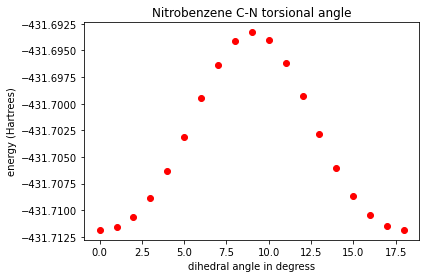

In [58]:
plt.figure()
plt.plot(energy_values, 'ro')
plt.xlabel('dihedral angle in degress')
plt.ylabel('energy (Hartrees)')
plt.title('Nitrobenzene C-N torsional angle')
plt.savefig('Nitrobenzene_PES_au.png', dpi=300)
plt.show()

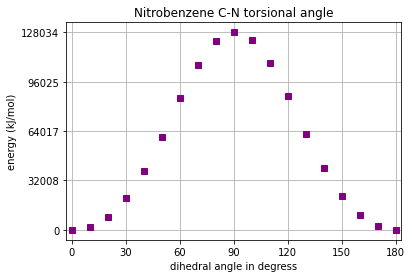

In [90]:
# Change the units from Hartrees to kJ/mol and scale the values such that the minimum is at zero.
energy_values_kj = np.array(energy_values) * 2625.5
#print(energy_values_kj)
energy_values_scaled = energy_values_kj - np.min(energy_values_kj)
#print(energy_values_scaled)

plt.figure()
plt.plot(phi, energy_values_scaled, 's',color='purple')
plt.xlabel('dihedral angle in degress')
plt.ylabel('energy (kJ/mol)')
plt.xlim(-3, 183)
plt.xticks(np.arange(0,181,30))
plt.yticks(np.linspace(0, np.max(energy_values_scaled), 5))
plt.title('Nitrobenzene C-N torsional angle')
plt.grid()
plt.savefig('Nitrobenzene_PES_scaled.png', dpi=300)
plt.show()



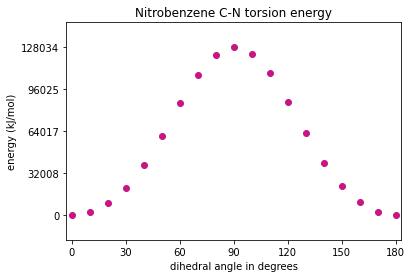

In [66]:
# their solution
# do the unit conversion
energy_values_kJ = np.array(energy_values) * (1/3.8088e-4)
# and let's define the lowest energy to be zero
energy_values_kJ = energy_values_kJ - min(energy_values_kJ)

# determine the maximum energy (for setting y axes limits)
Emax = max(energy_values_kJ)

# plot the energies at each iteration
### note that plt.xticks() and plt.yticks()
### utilize np.linspace() in this solution
plt.scatter(phi, energy_values_kJ, color='MediumVioletRed')
plt.xlim(min(phi)-3, max(phi)+3)
plt.xticks(np.linspace(start=0, stop=180, num=7))
plt.ylim(-Emax*0.15, Emax*1.15)
plt.yticks(np.linspace(start=0, stop=Emax, num=5))
plt.xlabel("dihedral angle in degrees")
plt.ylabel("energy (kJ/mol)")
plt.title("Nitrobenzene C-N torsion energy")
plt.show()

### Key Points
The xyz file is a standard file format for conveying molecular coordinates.

If you constrain the value of a particular intramolecular coordinate, the other coordinates may change their values to reach a new minimum energy structure.